# Credit Risk Analysis

- Nama : Rahmat Fajri
- Email : rfajri912@gmail.com
- [Portofoli](https://rfajri27.github.io/MyPortfolio/)

Project ini menggunakan data *risk rating* berdasarkan data historis lamanya proses pengembalian pinjaman. Pada project ini akan dilakukan analisis terhadpa data dan membuat *decision making model* terhadap pengajuan pinjaman baru.

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

## Load Data

In [3]:
df = pd.read_excel('data/credit_scoring.xlsx')

df.head()

,kode_kontrak,pendapatan_setahun_juta,kpr_aktif,durasi_pinjaman_bulan,jumlah_tanggungan,rata_rata_overdue,risk_rating
0,AGR-000001,295,YA,48,5,61 - 90 days,4
1,AGR-000011,271,YA,36,5,61 - 90 days,4
2,AGR-000030,159,TIDAK,12,0,0 - 30 days,1
3,AGR-000043,210,YA,12,3,46 - 60 days,3
4,AGR-000049,165,TIDAK,36,0,31 - 45 days,2


In [5]:
df.describe()

,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan,risk_rating
count,900.000000,900.000000,900.000000,900.000000
mean,163.318889,29.933333,2.932222,2.681111
std,51.863210,13.671988,2.007457,1.294928
min,70.000000,12.000000,0.000000,1.000000
25%,121.000000,12.000000,1.000000,1.000000
50%,162.000000,24.000000,3.000000,3.000000
75%,199.000000,48.000000,5.000000,3.000000
max,300.000000,48.000000,6.000000,5.000000


In [6]:
df.nunique()

kode_kontrak               900
pendapatan_setahun_juta    203
kpr_aktif                    2
durasi_pinjaman_bulan        4
jumlah_tanggungan            7
rata_rata_overdue            5
risk_rating                  5
dtype: int64

## Exploratory Data Analysis

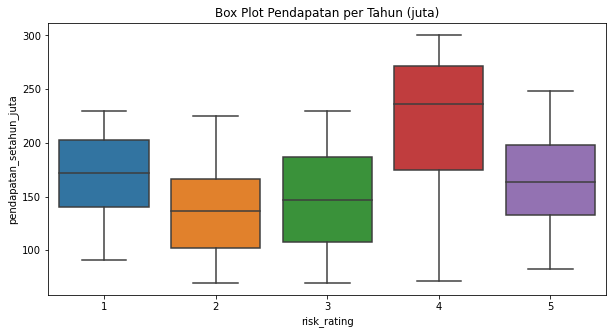

In [13]:
plt.figure(figsize=(10,5))  
ax = sns.boxplot(x = 'risk_rating',y = 'pendapatan_setahun_juta', data = df)  
plt.title ('Box Plot Pendapatan per Tahun (juta)', fontsize=12)
#plt.savefig('images/box_plot_pendapatan.png')
plt.show() 

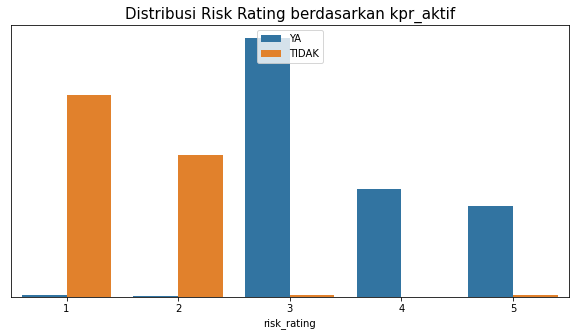

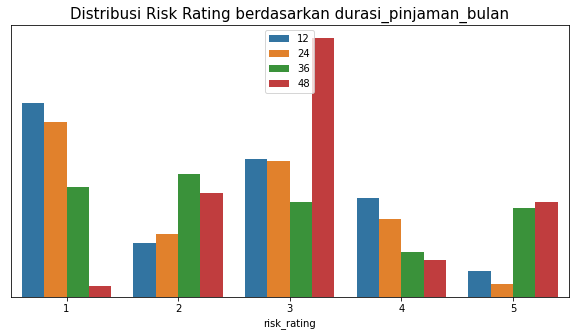

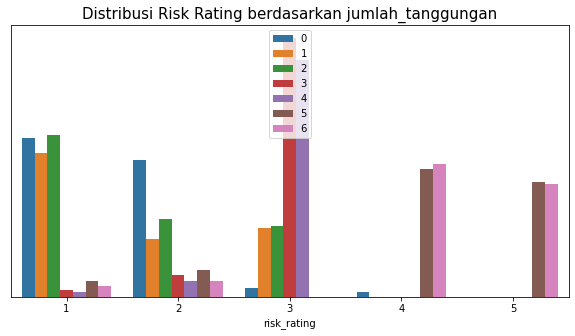

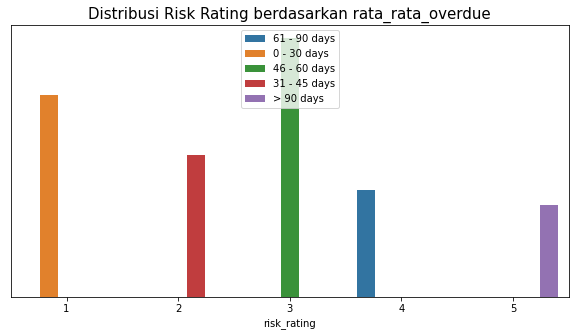

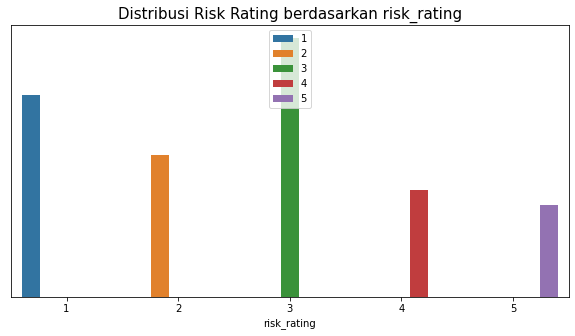

In [15]:
kolom_kategorik = ['kpr_aktif', 'durasi_pinjaman_bulan', 'jumlah_tanggungan', 
                   'rata_rata_overdue', 'risk_rating']

for i in kolom_kategorik:  
    plt.figure(figsize=(10,5))  
    ax = sns.countplot(data = df, x = 'risk_rating', hue = i )  
    plt.title('Distribusi risk rating berdasarkan {}'.format(i), fontsize=15)  
    ax.legend(loc="upper center")  
    
    #sns.despine(right=True,top = True, left = True)  
    ax.axes.yaxis.set_visible(False)
    #plt.savefig('images/plot_cc_{}'.format(i))
    plt.show()  

In [11]:
df.columns

Index(['kode_kontrak', 'pendapatan_setahun_juta', 'kpr_aktif',
       'durasi_pinjaman_bulan', 'jumlah_tanggungan', 'rata_rata_overdue',
       'risk_rating'],
      dtype='object')